In [38]:
# Import the necessary packages
import osmnx as ox
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.ops import transform
import pyproj

In [39]:
# Define local parameters for the EPSG and area for respective urban area
epsg = "EPSG:27700"
area = "Greater Manchester"

In [40]:
# Import population grid of respective urban area
popgrid = gpd.read_file('popgridmanchesternew.gpkg')

c:\Users\Gebruiker\anaconda3\envs\ssml\lib\site-packages\fiona\model.py:126: ResourceWarning: unclosed <socket.socket fd=4608, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.2.22', 53761), raddr=('162.55.144.139', 443)>
  return {


In [41]:
# Make a subselection of rows for testing purposes
#popgrid = popgrid[0:1000]

In [42]:
# Import the buffer
buffer_gdkg = gpd.read_file('bufferintersect_gdf.gpkg')

In [43]:
buildings = ox.geometries_from_place(area, tags={'building': True})
buildings = buildings.to_crs(epsg)
buildings = buildings.reset_index()

In [44]:
# Initialize an empty list to store the calculated build density
building_densities = []

In [45]:
for index, row in popgrid.iterrows():
    # Extract the geometry of the population grid
    grid_geometry = row.geometry

    # Find the corresponding buffer polygon from the buffer geopackage
    buffer_polygon = buffer_gdkg.iloc[index]['geometry']

    # Clip the buildings data to the buffer polygon
    buildings_within_buffer = buildings[buildings.intersects(buffer_polygon)]

    # Calculate the total area of buildings within the buffer
    building_area = buildings_within_buffer.area.sum()

    # Calculate the building density per unit area
    building_density = building_area / buffer_polygon.area

    # Append the building density to the list
    building_densities.append(building_density)

In [46]:
# Save diversity_scores as column in dataframe
popgrid['building_density'] = building_densities

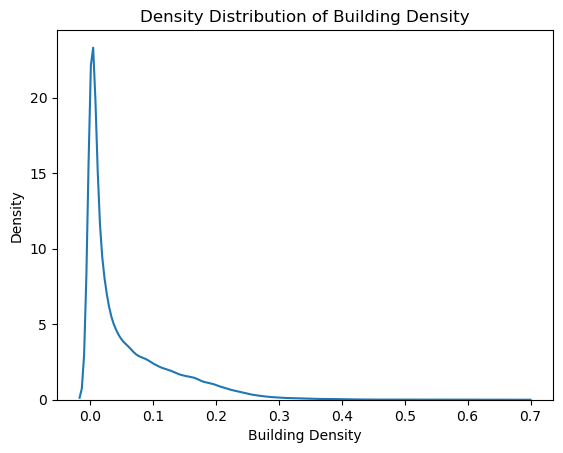

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(popgrid['building_density'])
plt.xlabel('Building Density')
plt.ylabel('Density')
plt.title('Density Distribution of Building Density')
plt.show()

In [49]:
#Export population grid to GPKG
popgrid.to_file('popgridmanchesternew3.gpkg', driver='GPKG')